In [1]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import gym
from gym import spaces
import random
from collections import defaultdict

In [7]:
import requests
import pandas as pd
from io import BytesIO
from zipfile import ZipFile

# Correct URL to the zip file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip"
file_path = "diabetes+130-us+hospitals+for+years+1999-2008.zip"

# Download the zip file
response = requests.get(url, stream=True)
response.raise_for_status()

# Extract the CSV file from the zip file in memory
with ZipFile(BytesIO(response.content)) as zip_ref:
    csv_filename = zip_ref.namelist()[0]  # Get the name of the CSV file
    with zip_ref.open(csv_filename) as file:
        data = pd.read_csv(file)  # Read the CSV into a pandas DataFrame

# Display basic dataset information
print("Dataset Information:")
print(data.info())
print("\nFirst 5 Rows:")
print(data.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-n

In [8]:
# Step 2: Data Preprocessing and Target Separation
# Define the target column
target_column = 'readmitted'  # Change if needed
X = data.drop(columns=[target_column])
y = data[target_column]

# Encode categorical columns
X = pd.get_dummies(X, drop_first=True)

# Encode the target if it's categorical
if y.dtype == 'object':
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nData preprocessing complete. Shapes - X_train:", X_train.shape, ", X_test:", X_test.shape)


Data preprocessing complete. Shapes - X_train: (81412, 2434) , X_test: (20354, 2434)



Random Forest Classifier Accuracy: 0.5968851331433624

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.01      0.02      2285
           1       0.53      0.38      0.44      7117
           2       0.62      0.86      0.72     10952

    accuracy                           0.60     20354
   macro avg       0.54      0.42      0.39     20354
weighted avg       0.57      0.60      0.54     20354



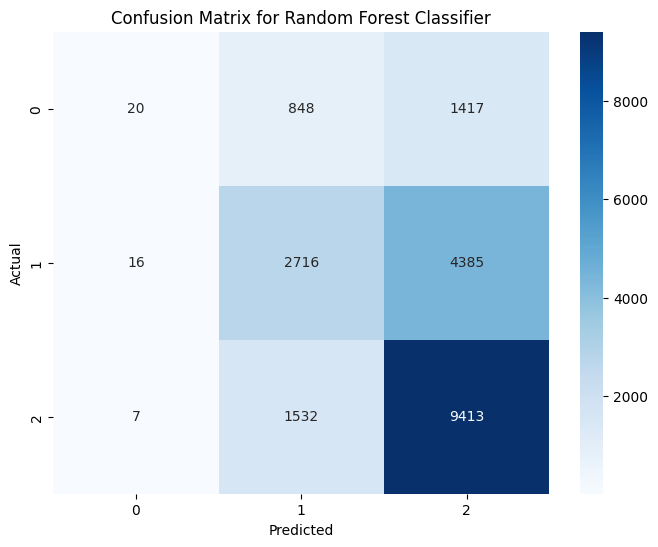

In [9]:
# Step 3: Classification Using Random Forest
# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions and metrics
y_pred = rf_classifier.predict(X_test)
print("\nRandom Forest Classifier Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Random Forest Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Silhouette Score for K-Means Clustering: 0.1484428760902283


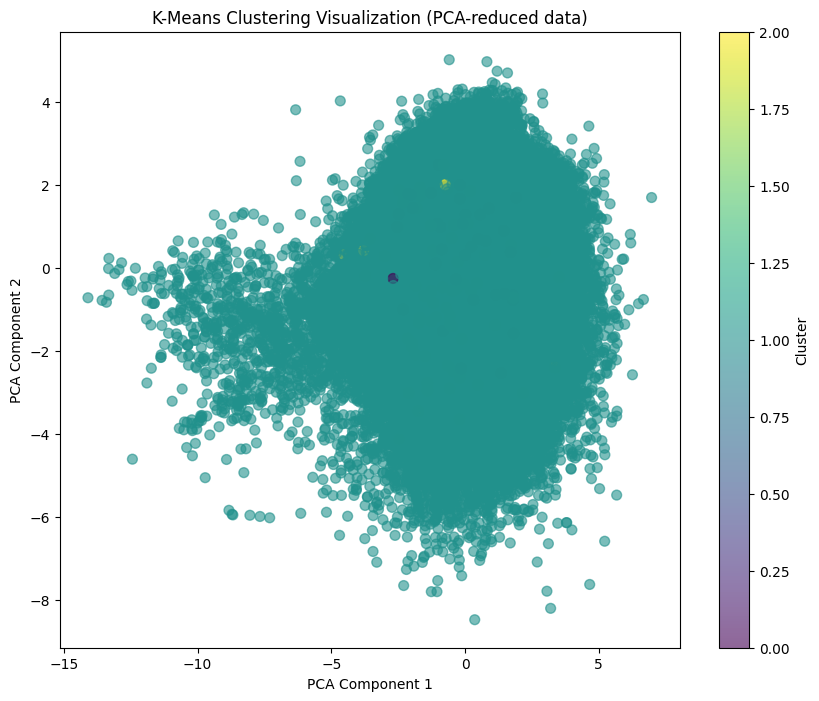

In [10]:
# Step 4: Clustering Using K-Means
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)
clusters = kmeans.predict(X_train)
silhouette_avg = silhouette_score(X_train, clusters)
print("\nSilhouette Score for K-Means Clustering:", silhouette_avg)

# PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.6)
plt.title("K-Means Clustering Visualization (PCA-reduced data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Sample Q-table values after training: {b'$\x90\x02F_*\xeb?\x90\xb59\xd7\x12\xba\xea?\x8e\xe3\x979\xd2\xa8\xe6\xbfJD\x8e\xf6\x8c\x06\xf6?j\xb0\xfc/6\xa5\xd3?B\xf6\xecT!N\x04@=\xb4\xa0I9\x9d\x02@\xb1\xb1\x0b\x1c\xe9\xd8\xd8?\xa3l6\xdf\x17\xb8\xf1?.o\xd5\xd4\xd3\xfc\xdf?fO\xf6Ogi\xcb\xbfU\xd9\xe9\xf75c\xd2?\x04\x00;p\x99\x1c\xea?}dT\xd0\xec\x9c\x00@"\xed\tM1w\xb4\xbf\x18@\x8d6\x0f\x8b\xfb\xbf\xfd\xdc\x08#\xf6h\xc2\xbfQ\x1b\xd8d4\xa4\xbf\xbf,\xbf\x01^/\xb2\xed\xbfD\xce\x85nGMt\xbf3\x03B\xa3\xdc!\xb5\xbfw\x10\xc0&\xf0\x86\xc0\xbf\t\xa2\x10\xdb\xa0*\xc9\xbf\xb4\x8b\xfa\xd6\n\xd9\xd4\xbf\xfee\x95\xfe\xe9\xd6\xdc\xbf!\x0c\xd9\x80-\x06\xe1\xbf\xf6\x9b\x1e*O>\xfb?\xdffi\x08\x9f\xd5\xdc\xbf\x01\xd64\xa2w\x86\xc5\xbf\x82\x86\x18\xe7;\x10\xc7?\xa4HL*I\xee\x94\xbf\xc6N\x83\xfda\xfb\xb3\xbf\xf7\x01\x93\xb3\x19\xeb\xa2\xbf|Q\xed\xa5<N\x94\xbfd\x83\x7f\x14\x16\x95\x81\xbf\xd6\xaa\x93\x94\xc7\x0e\xa0\xbf\x01\xa5\xdeH\xddL\xb8\xbf\xde} a\xff\x9c\xbd\xbf\xd1\xbc\xf1\x96@\x04\xcc\xbf\x0b\x08CM\xd6\x96\xa3

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


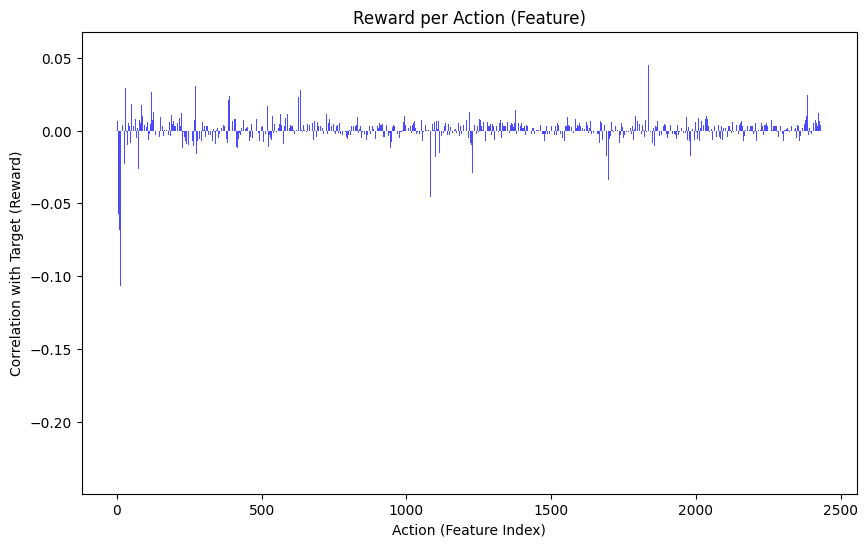

In [11]:
# Step 5: Reinforcement Learning Environment Setup and Q-Learning
# Define a custom gym environment for feature selection
class DiabetesEnv(gym.Env):
    def __init__(self, data, target):
        super(DiabetesEnv, self).__init__()
        self.data = data.select_dtypes(include=[np.number])  # Only numeric features
        self.target = target
        self.action_space = spaces.Discrete(self.data.shape[1])  # One action per feature
        self.observation_space = spaces.Box(low=0, high=1, shape=(self.data.shape[1],), dtype=np.float32)
        self.reset()

    def reset(self):
        self.state = np.random.choice(self.data.index)
        return self.data.iloc[self.state].values

    def step(self, action):
        reward = np.corrcoef(self.data.iloc[:, action], self.target)[0, 1] if action < self.data.shape[1] else 0
        done = True  # Single-step environment
        return self.data.iloc[self.state].values, reward, done, {}

# Initialize the environment
env = DiabetesEnv(pd.DataFrame(X_train), y_train)

# Q-learning parameters
num_episodes = 100
learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.1  # Epsilon-greedy

# Q-table
q_table = defaultdict(lambda: np.zeros(env.action_space.n))

for episode in range(num_episodes):
    state = env.reset()
    done = False

    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state.tobytes()])

        next_state, reward, done, _ = env.step(action)
        best_next_action = np.argmax(q_table[next_state.tobytes()])
        td_target = reward + discount_factor * q_table[next_state.tobytes()][best_next_action]
        td_error = td_target - q_table[state.tobytes()][action]
        q_table[state.tobytes()][action] += learning_rate * td_error
        state = next_state

# Display sample Q-values after training
sample_q_values = dict(list(q_table.items())[:5])
print("\nSample Q-table values after training:", sample_q_values)

# Graph of rewards per action
actions = list(range(env.action_space.n))
rewards = [np.corrcoef(env.data.iloc[:, a], env.target)[0, 1] for a in actions]
plt.figure(figsize=(10, 6))
plt.bar(actions, rewards, color='blue', alpha=0.7)
plt.xlabel("Action (Feature Index)")
plt.ylabel("Correlation with Target (Reward)")
plt.title("Reward per Action (Feature)")
plt.show()